# 구글 드라이브 마운트 및 path 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 모듈 불러오기

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/경희대학원 데이터마이닝/'

In [3]:
!pip install catboost

In [4]:
!pip install phik

In [77]:
# import 'os'
import os

# import 'random'
import random

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

# import phi corr
import phik

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [6]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [7]:
# 나눔 폰트 실행
plt.rc('font', family='NanumBarunGothic') 

# 주제 및 목표

한국인의 절반은 아파트에 살고 있기 때문에 아파트 주거 선호도가 매우 높습니다.

또한 부의 증식 수단으로 생각 하기 때문에 아파트 가격에 관심이 많습니다.

최근 매물 가격 정보는 직방, 다음부동산, 네이버부동산에서 볼 수 있습니다.

하지만 최근 매물 가격은 아직 거래되지 않아 정확하지 않은 정보 일 수 있습니다.


이에따라, 해당 데이터를 활용하여 아파트 구매자들의 비대칭성 정보를 해결하기 위해 미래의 아파트 실 거래가 예측을 목표로 합니다. 

(서울과 부산 아파트 실 거래가 및 아파트, 학교, 지하철역 정보 활용)

# 데이터 출처 : 직방

# 데이터 변수 설명

ㅇ apartment_info.csv 
  - apartment_id : 아파트 아이디
  - city : 도시
  - dong : 동
  - jibun : 지번
  - apt 아파트단지 이름
  - addr_kr : 주소 
  - exclusive_use_area : 전용면적
  - year_of_completion : 설립일자
  - transaction_year_month : 거래년월
  - transaction_date : 거래날짜
  - floor : 층
  - transaction_real_price : 실거래가

ㅇ day_care_center.csv
  - city : 도시 이름
  - gu : 구 
  - day_care_name : 어린이집 이름
  - day_care_type : 어린이집 종류
  - day_care_baby_num : 정원수
  - teacher_num : 보육교직원수
  - nursing_room_num : 보육실수
  - play_ground_num : 놀이터수
  - CCTV_num : CCTV 설치수
  - is_commuting_vehicle : 통학차량 운영여부
  - reference_date : 데이터 기록된 일자

ㅇ park.csv
  - city : 도시 이름
  - gu : 구 
  - dong : 동 
  - park_name : 공원 이름
  - park_type : 공원 종류
  - park_area : 공원의 넓이
  - park_exercise_facility : 공원보유 운동시설
  - park_entertainment_facility : 공원보유 유희시설
  - park_benefit_facility : 공원보유 편익시설
  - park_cultural_facility : 공원보유 교양시설
  - park_facility_other : 공원보유 기타시설
  - park_open_year : 공원 개장년도
  - reference_date : 데이터 기록된 일자

# 데이터 불러오기

In [8]:
apartment_info = pd.read_csv(os.path.join(path,'apartment_info.csv'))
day_care_center = pd.read_csv(os.path.join(path,'day_care_center.csv'))
park = pd.read_csv(os.path.join(path,'park.csv'))

# 데이터 준비

1. apartment_info

In [9]:
apartment_info.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [10]:
apartment_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [11]:
apartment_info.shape

(1216553, 13)

2. day_care_center

In [12]:
day_care_center.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [13]:
day_care_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


In [14]:
day_care_center.shape

(7551, 11)

3. park

In [15]:
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [16]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

In [17]:
park.shape

(1359, 13)

# 데이터 결측값 확인

In [18]:
train = apartment_info.drop(['transaction_id'], axis=1)

In [19]:
# 결측 값 확인
train.isnull().sum()

apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [20]:
day_care_center.isnull().sum()

city                       0
gu                         0
day_care_name              0
day_care_type              0
day_care_baby_num          0
teacher_num              225
nursing_room_num        3199
playground_num          3925
CCTV_num                2271
is_commuting_vehicle     496
reference_date             0
dtype: int64

In [21]:
park.isnull().sum()

city                              0
gu                                3
dong                              0
park_name                         0
park_type                         0
park_area                         0
park_exercise_facility         1082
park_entertainment_facility     924
park_benefit_facility          1093
park_cultural_facitiy          1287
park_facility_other            1184
park_open_year                  422
reference_date                    0
dtype: int64

# 범주형 데이터 기본 통계치









In [22]:
train.describe(include='object')

,city,dong,jibun,apt,addr_kr,transaction_date
count,1216553,1216553,1216553,1216553,1216553,1216553
unique,2,473,8961,10440,12533,6
top,서울특별시,상계동,176-30,현대,용호동 944 오륙도에스케이뷰,11~20
freq,742285,29346,6594,13154,3220,408385


In [23]:
day_care_center.describe(include='object')

,city,gu,day_care_name,day_care_type,is_commuting_vehicle,reference_date
count,7551,7551,7551,7551,7055,7551
unique,2,35,4751,7,5,31
top,서울특별시,강서구,다솜어린이집,가정,N,2018-02-19
freq,5656,997,22,3120,4102,1108


In [24]:
park.describe(include='object')

,city,gu,dong,park_name,park_type,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,reference_date
count,1359,1356,1359,1359,1359,277,435,266,72,175,1359
unique,2,36,237,1221,10,124,201,72,33,100,31
top,서울특별시,강서구,화곡동,소공원,어린이공원,0,조합놀이대,화장실,없음,없음,2019-01-01
freq,930,148,31,14,791,16,73,59,23,23,179


In [25]:
# 시도 별 분포 살펴보기 
train['city'].value_counts(normalize=True)*100

서울특별시    61.015426
부산광역시    38.984574
Name: city, dtype: float64

In [26]:
day_care_center['city'].value_counts(normalize=True)*100

서울특별시    74.903986
부산광역시    25.096014
Name: city, dtype: float64

In [27]:
park['city'].value_counts(normalize=True)*100

서울특별시    68.432671
부산광역시    31.567329
Name: city, dtype: float64

# 수치형 데이터 기본 통계치

In [28]:
train.describe(exclude='object')

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06
mean,6.299685e+03,7.816549e+01,1.998297e+03,2.012984e+05,9.343291e+00,3.822769e+04
std,3.581169e+03,2.915113e+01,8.941347e+00,2.905732e+02,6.606500e+00,3.104898e+04
min,0.000000e+00,9.260000e+00,1.961000e+03,2.008010e+05,-4.000000e+00,1.000000e+02
25%,3.345000e+03,5.976000e+01,1.993000e+03,2.010100e+05,4.000000e+00,1.900000e+04
50%,5.964000e+03,8.241000e+01,1.999000e+03,2.013120e+05,8.000000e+00,3.090000e+04
75%,9.436000e+03,8.497000e+01,2.005000e+03,2.015110e+05,1.300000e+01,4.700000e+04
max,1.265800e+04,4.243200e+02,2.017000e+03,2.017110e+05,8.000000e+01,8.200000e+05


In [29]:
day_care_center.describe(exclude='object')

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
count,7551.000000,7326.000000,4352.000000,3626.000000,5280.000000
mean,44.396636,9.013514,4.528033,0.398235,6.676136
std,37.022079,5.809909,2.075709,0.730602,4.482168
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,6.000000,3.000000,0.000000,4.000000
50%,29.000000,7.000000,4.000000,0.000000,5.000000
75%,60.000000,11.000000,5.000000,1.000000,8.000000
max,489.000000,98.000000,22.000000,16.000000,53.000000


In [30]:
park.describe(exclude='object')

,park_area,park_open_year
count,1.359000e+03,937.000000
mean,5.886255e+04,1990.151547
std,3.868052e+05,17.656216
min,2.200000e+01,1938.000000
25%,1.050250e+03,1977.000000
50%,1.680000e+03,1992.000000
75%,6.609600e+03,2006.000000
max,6.692795e+06,2018.000000


# 데이터 EDA

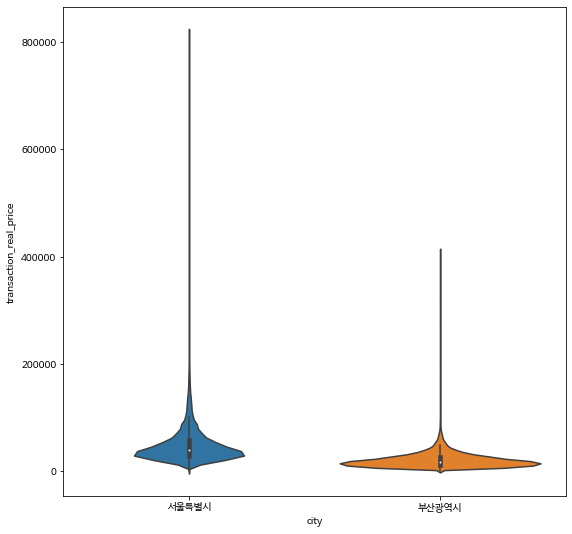

In [31]:
sns.violinplot('city', 'transaction_real_price', data=train.sample(frac=1, random_state=42))
plt.gcf().set_size_inches(9,9)

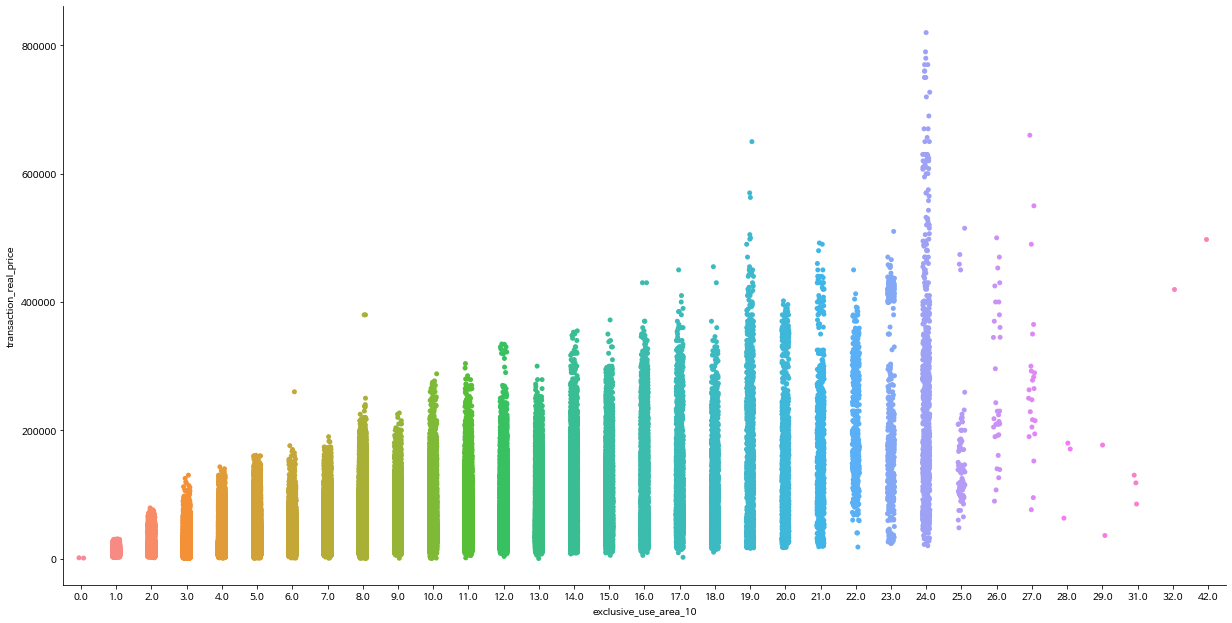

In [32]:
train['exclusive_use_area_10']=train['exclusive_use_area']//10
sns.catplot('exclusive_use_area_10','transaction_real_price', data=train.sample(frac=1, random_state=42))
plt.gcf().set_size_inches(20,9)
train.drop(['exclusive_use_area_10'], axis=1, inplace=True)

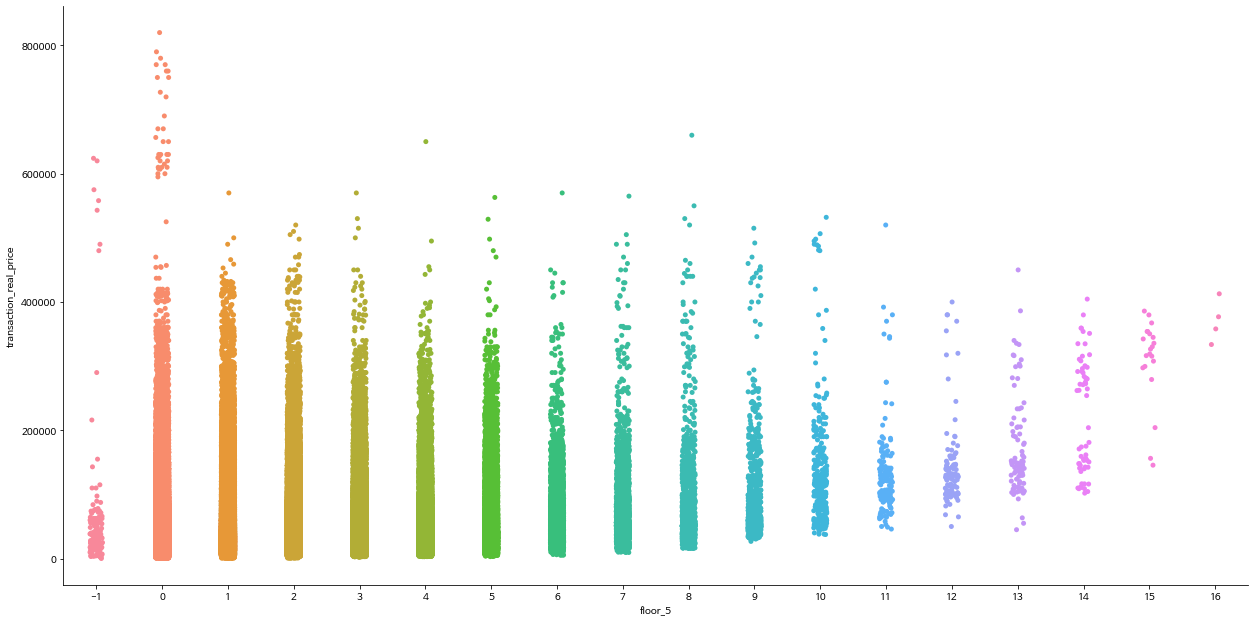

In [33]:
train['floor_5']=train['floor']//5
sns.catplot('floor_5','transaction_real_price', data=train.sample(frac=1, random_state=42))
plt.gcf().set_size_inches(20,9)
train.drop(['floor_5'], axis=1, inplace=True)

# 상관 관계

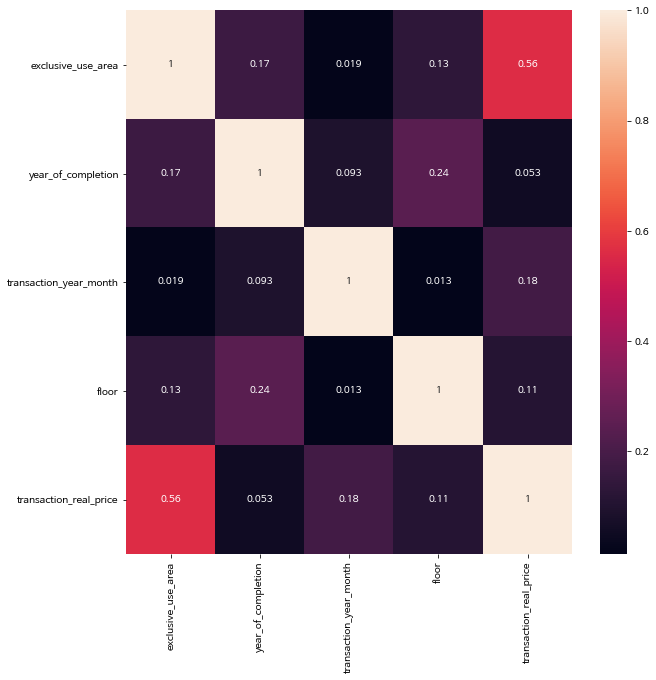

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr().iloc[1:, 1:], annot=True)
plt.show()

# 데이터 전처리

## 컬럼별로 겹치는  데이터 확인
- 같은 명의 데이터를 가지는 것은 좋지 않다

In [35]:
train.columns

Index(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr',
       'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
       'transaction_date', 'floor', 'transaction_real_price'],
      dtype='object')

In [36]:
# 서울과 부산에서 dong, jibun, apt 컬럼이 겹치는 것 확인 
for column in ['apartment_id', 'dong', 'jibun', 'apt', 'addr_kr']:
    busan_element = train[train['city']=='부산광역시'][column].unique()
    seoul_element = train[train['city']=='서울특별시'][column].unique()
    inter_element = set(busan_element)&set(seoul_element)
    print('{:15s} : {:5d} 개'.format(column, len(inter_element)))
    if len(inter_element)>0:
        print(inter_element,'\n')

apartment_id    :     0 개
dong            :     4 개
{'사직동', '송정동', '부암동', '중동'} 

jibun           :   981 개
{'925-1', '1000', '632-4', '46-3', '3', '410-13', '506-1', '1333', '1331', '442-1', '6-4', '402', '1051', '953', '45-2', '23-3', '1087-4', '418-3', '849-1', '378', '64-15', '657', '577-4', '1529', '116', '370-4', '350-3', '244-8', '100-12', '249-3', '541-1', '5-3', '365-11', '454-2', '322-1', '8', '137', '40', '43-4', '53-1', '731', '1054', '356-3', '413-8', '70-5', '1218-1', '97-8', '47', '1006-1', '501', '93-8', '352-4', '922', '116-24', '5-1', '213-3', '755', '11-5', '279', '200-4', '378-6', '34-3', '221-1', '512-2', '512', '957', '954', '607-17', '317', '44-10', '585-25', '90-1', '65-1', '1286', '7-1', '1660', '220', '955', '1310', '338-1', '51-1', '402-10', '135', '900-1', '184-4', '196', '170-1', '447-2', '413-1', '649', '160-2', '945', '585-6', '445-4', '358-18', '435-1', '202-5', '420-9', '450-1', '805-1', '759', '159', '850', '730', '108-2', '41', '458-1', '299', '494-4'

In [37]:
# 겹치는 데이터는 구분해준다
for column in ['dong', 'jibun', 'apt']:
    busan_element = train[train['city']=='부산광역시'][column].unique()
    seoul_element = train[train['city']=='서울특별시'][column].unique()
    inter_element = set(busan_element)&set(seoul_element)
    
    for element in list(inter_element):
        train.loc[(train['city']=='부산광역시') & (train[column] == element), column] = '부산_{}'.format(element)
        train.loc[(train['city']=='서울특별시') & (train[column] == element), column] = '서울_{}'.format(element)

In [39]:
#train.loc[(train['city']=='부산광역시') & (train['dong'] == '부산_사직동'), 'dong']

727124     부산_사직동
727125     부산_사직동
727126     부산_사직동
727127     부산_사직동
727128     부산_사직동
            ...  
1193304    부산_사직동
1193305    부산_사직동
1193306    부산_사직동
1193307    부산_사직동
1193308    부산_사직동
Name: dong, Length: 7160, dtype: object

In [42]:
train.loc[(train['city']=='서울특별시') & (train['dong'] == '서울_사직동'), 'dong']

359        서울_사직동
360        서울_사직동
361        서울_사직동
362        서울_사직동
363        서울_사직동
            ...  
1093273    서울_사직동
1093274    서울_사직동
1093275    서울_사직동
1093276    서울_사직동
1093277    서울_사직동
Name: dong, Length: 345, dtype: object

In [41]:
#  전처리한 아파트 정보 데이터. 이것만 따로 돌리기 위해 복사
apartment_p= train.copy()
apartment_p.head()

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,3578,서울특별시,필운동,서울_174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


## 공원과 유치원 데이터 전처리
- 결측값이 많은 변수는 삭제

In [43]:
# 각 변수별로 몇 프로가 결측값인지
print(park.isnull().sum()/len(park)*100,'\n\n')
print(day_care_center.isnull().sum()/len(day_care_center)*100)

city                            0.000000
gu                              0.220751
dong                            0.000000
park_name                       0.000000
park_type                       0.000000
park_area                       0.000000
park_exercise_facility         79.617366
park_entertainment_facility    67.991170
park_benefit_facility          80.426784
park_cultural_facitiy          94.701987
park_facility_other            87.122884
park_open_year                 31.052244
reference_date                  0.000000
dtype: float64 


city                     0.000000
gu                       0.000000
day_care_name            0.000000
day_care_type            0.000000
day_care_baby_num        0.000000
teacher_num              2.979738
nursing_room_num        42.365250
playground_num          51.979870
CCTV_num                30.075487
is_commuting_vehicle     6.568666
reference_date           0.000000
dtype: float64


In [44]:
# 결측값 많은 변수 삭제
park = park.drop(['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy','park_facility_other',
          'park_open_year'], axis=1)
day_care_center = day_care_center.drop(['nursing_room_num', 'playground_num', 'CCTV_num', 'is_commuting_vehicle'], axis=1)
day_care_center['teacher_num'] = day_care_center['teacher_num'].fillna(day_care_center['teacher_num'].mean())

In [45]:
# 동 별로 평균값 추출
park_dong_mean = park.groupby('dong').mean().reset_index()
day_care_gu_mean = day_care_center.groupby('gu').mean().reset_index()

In [46]:
park_dong_mean

,dong,park_area
0,가락동,7914.030769
1,가산동,1216.866667
2,가야동,24254.000000
3,가양동,16307.464286
4,갈현동,1385.466667
...,...,...
232,회동동,3063.066667
233,효창동,85901.000000
234,후암동,1261.000000
235,휘경동,1393.180000


In [47]:
day_care_gu_mean

,gu,day_care_baby_num,teacher_num
0,강남구,52.040359,9.013514
1,강동구,48.816176,9.889706
2,강북구,51.311377,10.023952
3,강서구,40.583751,8.038114
4,관악구,42.594096,9.088561
5,광진구,44.558376,9.467005
6,구로구,40.317365,8.374251
7,금정구,49.537736,9.990566
8,금천구,47.922619,9.898810
9,기장군,43.196629,8.584270


## 파생 변수 생성

In [48]:
# 공원 데이터에 구 별 보육원 개수 평균 및 선생님 평균수를 나타내는 변수 추가
for gu, care_baby, teacher in zip(day_care_gu_mean['gu'].values, day_care_gu_mean['day_care_baby_num'].values, day_care_gu_mean['teacher_num'].values):
    park.loc[(park['gu']==gu), 'day_care_baby_num_mean'] = care_baby
    park.loc[(park['gu']==gu), 'teacher_mean'] = teacher

In [49]:
# 추가 해준 변수 결측값 76개 확인
print(park['day_care_baby_num_mean'].isnull().sum())
print(park['teacher_mean'].isnull().sum())


76
76


In [50]:
park.head()

,city,gu,dong,park_name,park_type,park_area,reference_date,day_care_baby_num_mean,teacher_mean
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,2018-08-14,46.685315,8.412587
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,2018-08-14,46.685315,8.412587
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,2018-08-14,46.685315,8.412587
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,2018-08-14,46.685315,8.412587
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,2018-08-14,46.685315,8.412587


In [51]:
# 결측값에 변수 평균 데이터 추가
park['day_care_baby_num_mean']  = park['day_care_baby_num_mean'].fillna(park['day_care_baby_num_mean'].mean())
park['teacher_mean']  = park['teacher_mean'].fillna(park['teacher_mean'].mean())

## 훈련 데이터에 파생 변수 추가 

In [52]:
park_groupby = park.groupby(by='dong').mean().reset_index().iloc[:]

In [53]:
park_groupby.head()

,dong,park_area,day_care_baby_num_mean,teacher_mean
0,가락동,7914.030769,41.188264,8.706601
1,가산동,1216.866667,47.922619,9.898810
2,가야동,24254.000000,43.909091,8.333333
3,가양동,16307.464286,40.583751,8.038114
4,갈현동,1385.466667,49.508834,9.240283


In [54]:
for dong, park_area, day_care_baby_num_mean, teacher_mean in zip(park_groupby['dong'].values, park_groupby['park_area'].values, park_groupby['day_care_baby_num_mean'].values, park_groupby['teacher_mean'].values):
    train.loc[train['dong']==dong, 'day_care_baby_num_mean'] = day_care_baby_num_mean
    train.loc[train['dong']==dong, 'park_area'] = park_area
    train.loc[train['dong']==dong, 'teacher_num'] = teacher_mean
    

# 인코딩

In [60]:
# # 전처리한 아파트 정보 데이터만 인코딩
# LE.fit(list(apartment_p['city']))
# apartment_p['city'] = LE.transform(apartment_p['city'])

# LE.fit(list(apartment_p['dong']))
# apartment_p['dong'] = LE.transform(apartment_p['dong'])

# LE.fit(list(apartment_p['jibun']))
# apartment_p['jibun'] = LE.transform(apartment_p['jibun'])

# LE.fit(list(apartment_p['apt']))
# apartment_p['apt'] = LE.transform(apartment_p['apt'])

# LE.fit(list(apartment_p['addr_kr']))
# apartment_p['addr_kr'] = LE.transform(apartment_p['addr_kr'])

# apartment_p['year_of_completion'] = 2017-apartment_p['year_of_completion'].values

# apartment_p['transaction_year'] = 2017 - np.array([int(str(k)[:4]) for k in apartment_p['transaction_year_month'].values])

# apartment_p['transaction_month'] = np.array([int(str(k)[4:]) for k in apartment_p['transaction_year_month'].values])

# LE.fit(list(apartment_p['transaction_year_month']))
# apartment_p['transaction_year_month'] = LE.transform(apartment_p['transaction_year_month'])

# LE.fit(list(apartment_p['transaction_date']))
# apartment_p['transaction_date'] = LE.transform(apartment_p['transaction_date'])

In [61]:
LE.fit(list(train['city']))
train['city'] = LE.transform(train['city'])

LE.fit(list(train['dong']))
train['dong'] = LE.transform(train['dong'])

LE.fit(list(train['jibun']))
train['jibun'] = LE.transform(train['jibun'])

LE.fit(list(train['apt']))
train['apt'] = LE.transform(train['apt'])

LE.fit(list(train['addr_kr']))
train['addr_kr'] = LE.transform(train['addr_kr'])

train['year_of_completion'] = 2017-train['year_of_completion'].values

train['transaction_year'] = 2017 - np.array([int(str(k)[:4]) for k in train['transaction_year_month'].values])

train['transaction_month'] = np.array([int(str(k)[4:]) for k in train['transaction_year_month'].values])

LE.fit(list(train['transaction_year_month']))
train['transaction_year_month'] = LE.transform(train['transaction_year_month'])

LE.fit(list(train['transaction_date']))
train['transaction_date'] = LE.transform(train['transaction_date'])


In [ ]:
train.head()

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,day_care_baby_num_mean,park_area,teacher_num,transaction_year,transaction_month
0,7622,1,257,6326,6369,7283,84.82,15,0,5,2,37500,NaN,NaN,NaN,9,1
1,5399,1,437,1492,4529,11687,99.17,44,0,1,6,20000,NaN,NaN,NaN,9,1
2,3578,1,437,2392,2969,11688,84.74,10,0,1,6,38500,NaN,NaN,NaN,9,1
3,10957,1,68,8671,9130,2491,146.39,14,0,0,15,118000,NaN,NaN,NaN,9,1
4,10639,1,68,540,8875,2486,194.43,13,0,5,3,120000,NaN,NaN,NaN,9,1


# Feature selection 메소드

In [62]:
def show_feature_importance(model, data):
    df=pd.DataFrame({'column':list(data.columns),
              'score':list(model.feature_importances_),
             })
    plt.figure(figsize=(20,10))
    sns.barplot(x="score", y="column", data=df)
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.xlabel('score', size=20)
    plt.ylabel('column', size=20)
    plt.show()

# 데이터 분리

In [120]:
drop_column = ['transaction_real_price']
X_data = train.drop(drop_column, axis=1)
y_data = train['transaction_real_price'].values

In [64]:
# drop_column = ['transaction_real_price']
# X_data_1 = apartment_p.drop(drop_column, axis=1)
# y_data_1 = apartment_p['transaction_real_price'].values


In [121]:
# 도시 별 층화 추출 실행. 8:2 비율로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2, random_state=42,stratify=train['city'])

In [66]:
# # 도시 별 층화 추출 실행. 8:2 비율로 나눔 (아파트 정보 데이터만 활용)
# X_train1, X_valid1, y_train1, y_valid1 = train_test_split(X_data_1, y_data_1, test_size=0.2, random_state=42,stratify=train['city'])

# 모델링

## RandomForest
- 결측값 있으면 자동으로 대체 불가.
- 결측값 처리 해줘야한다

In [ ]:
rf = RandomForestRegressor(
        n_estimators=100,
        criterion='mse',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        min_impurity_decrease=0.0,
        n_jobs=-1,
        random_state=42,
        
        verbose=1,
)

rf.fit(X_train.iloc[:,(X_train.isnull().sum()==0).values], y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.9min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=1, warm_start=False)

In [ ]:
print(np.sqrt(mean_squared_error(y_valid,rf.predict(X_valid.iloc[:,(X_train.isnull().sum()==0).values]))))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.3s


4003.786925716822


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   13.7s finished


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


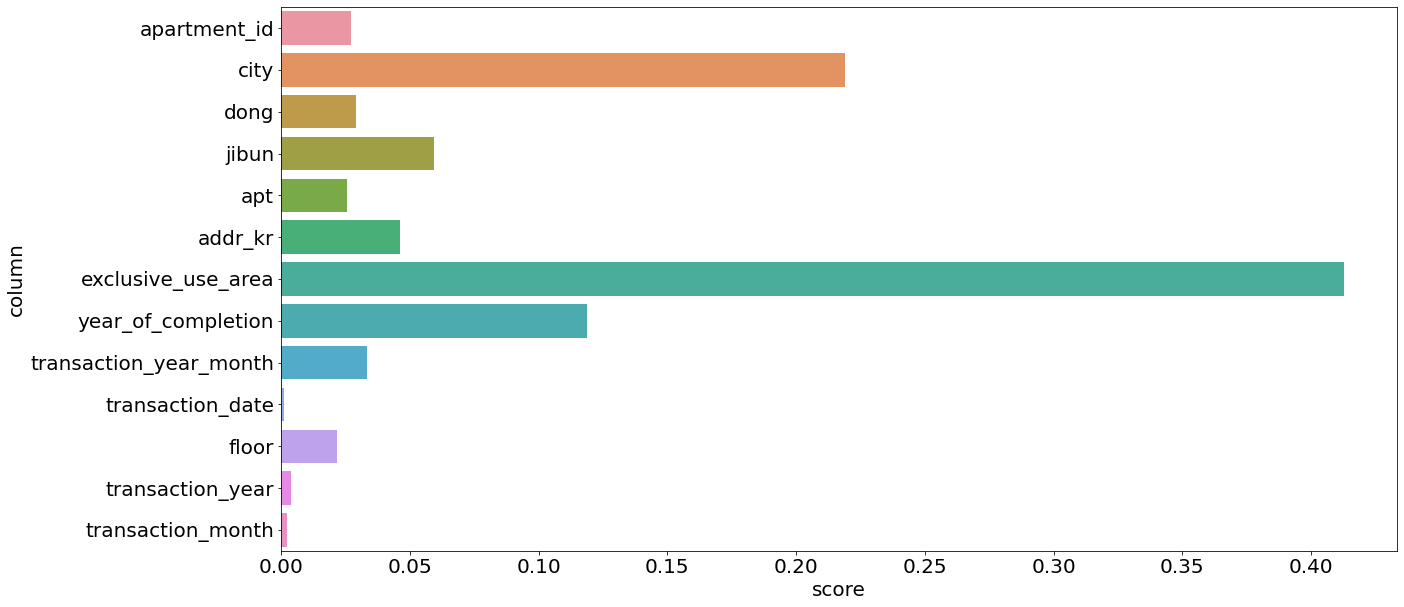

In [ ]:
show_feature_importance(rf, X_train.iloc[:,(X_train.isnull().sum()==0).values])

## Lightgbm

In [67]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [68]:
# lgbm 돌리시에는 카테고리형으로 바꿔줘야 한다.
category_columns = ['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']

for column in category_columns:
    train[column] = train[column].astype('category')       

In [72]:
# # lgbm 돌리시에는 카테고리형으로 바꿔줘야 한다.
# category_columns = ['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']

# for column in category_columns:
#     apartment_p[column] = apartment_p[column].astype('category')      

In [73]:
lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=20000,
    objective='regression',
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
#         max_bin=2*9
)


In [74]:
lgbm_model.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_valid1, y_valid1)], 
               eval_metric='rmse', verbose=200,
              early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[200]	training's l2: 6.22209e+07	training's rmse: 7888.02	valid_1's l2: 6.35211e+07	valid_1's rmse: 7970.01
[400]	training's l2: 4.11848e+07	training's rmse: 6417.54	valid_1's l2: 4.33187e+07	valid_1's rmse: 6581.7
[600]	training's l2: 3.23024e+07	training's rmse: 5683.52	valid_1's l2: 3.50307e+07	valid_1's rmse: 5918.68
[800]	training's l2: 2.71829e+07	training's rmse: 5213.72	valid_1's l2: 3.02832e+07	valid_1's rmse: 5503.02
[1000]	training's l2: 2.39027e+07	training's rmse: 4889.04	valid_1's l2: 2.73135e+07	valid_1's rmse: 5226.23
[1200]	training's l2: 2.14002e+07	training's rmse: 4626.03	valid_1's l2: 2.51233e+07	valid_1's rmse: 5012.31
[1400]	training's l2: 1.95752e+07	training's rmse: 4424.39	valid_1's l2: 2.35682e+07	valid_1's rmse: 4854.71
[1600]	training's l2: 1.81342e+07	training's rmse: 4258.42	valid_1's l2: 2.23272e+07	valid_1's rmse: 4725.16
[1800]	training's l2: 1.6923e+07	training's rmse: 4113.76	valid_1's l2

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20000, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=42, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [70]:
lgbm_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
               eval_metric='rmse', verbose=200,
              early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[200]	training's l2: 4.88903e+07	training's rmse: 6992.16	valid_1's l2: 4.98213e+07	valid_1's rmse: 7058.42
[400]	training's l2: 3.4017e+07	training's rmse: 5832.41	valid_1's l2: 3.57458e+07	valid_1's rmse: 5978.78
[600]	training's l2: 2.73784e+07	training's rmse: 5232.43	valid_1's l2: 2.96723e+07	valid_1's rmse: 5447.23
[800]	training's l2: 2.33086e+07	training's rmse: 4827.9	valid_1's l2: 2.60614e+07	valid_1's rmse: 5105.03
[1000]	training's l2: 2.06237e+07	training's rmse: 4541.33	valid_1's l2: 2.37325e+07	valid_1's rmse: 4871.6
[1200]	training's l2: 1.87364e+07	training's rmse: 4328.55	valid_1's l2: 2.21467e+07	valid_1's rmse: 4706.03
[1400]	training's l2: 1.73433e+07	training's rmse: 4164.53	valid_1's l2: 2.09809e+07	valid_1's rmse: 4580.49
[1600]	training's l2: 1.61875e+07	training's rmse: 4023.37	valid_1's l2: 2.00768e+07	valid_1's rmse: 4480.71
[1800]	training's l2: 1.51858e+07	training's rmse: 3896.9	valid_1's l2: 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=20000, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=42, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

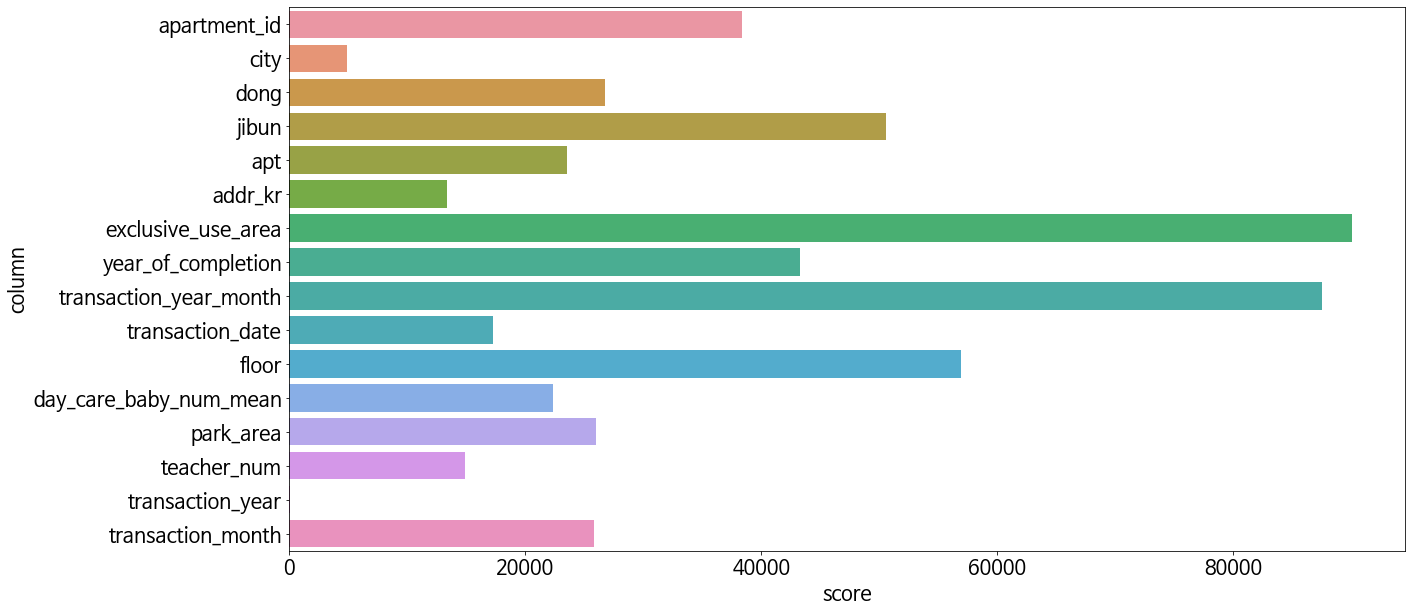

In [71]:
show_feature_importance(lgbm_model, X_valid)

In [ ]:
lgbm_result = lgbm_model.predict(X_valid)

In [ ]:
y_valid

array([30700, 37700, 17500, ..., 18000,  9500, 49500])

In [ ]:
price_df = pd.DataFrame({'예측': np.round(lgbm_result),
                             '실제':y_valid})

In [ ]:
price_df['예측'] = price_df['예측'].astype('int')
price_df

,예측,실제
0,29026,30700
1,36709,37700
2,16194,17500
3,25752,26800
4,47200,45500
...,...,...
243306,10830,10500
243307,24692,25500
243308,17567,18000
243309,9246,9500


## 인공신경망

In [ ]:
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
feature_columns = []

for numeric_col in ['exclusive_use_area', 'year_of_completion', 'floor', 'transaction_year']:
    feature_columns.append(feature_column.numeric_column(numeric_col))

In [ ]:
for col in ['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']:
    cat = feature_column.categorical_column_with_vocabulary_list(
          col, train[col].unique())
    cat_one_hot = feature_column.indicator_column(cat)

    
    dim=8
    if col=='city':
        dim=2
    embedding = feature_column.embedding_column(cat, dimension=dim)
    feature_columns.append(cat_one_hot)
    feature_columns.append(embedding)


In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='linear')
])

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('transaction_real_price')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [ ]:
TRAIN, VALID = train_test_split(train, random_state=42, test_size=0.2)

In [ ]:
train_ds = df_to_dataset(TRAIN.loc[:,['exclusive_use_area', 'year_of_completion', 'floor', 'transaction_year',
            'transaction_real_price', 'apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']], batch_size=1024)
val_ds=df_to_dataset(VALID.loc[:,['exclusive_use_area', 'year_of_completion', 'floor', 'transaction_year',
            'transaction_real_price', 'apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']], batch_size=1024)

In [ ]:
epochs=50
# decay_st = (len(TRAIN)//1024+1)*epochs
# poly_sche = tf.keras.optimizers.schedules.PolynomialDecay(1e-3, decay_st, end_learning_rate=1e-6, power=0.9)
# opt = tf.keras.optimizers.Adam(poly_sche)
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [ ]:
history =model.fit(train_ds,
          validation_data=val_ds,
          epochs=epochs)

Epoch 1/50
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
951/951 [==============================] - ETA: 0s - loss: 1040469056.0000 - root_mean_squared_error: 32256.3027WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'exclusive_use_area': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float64>, 'year_of_completion': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int64>, 'floor': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=int64>, 'transaction_year': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int64>, 'apartment_id': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=int64>, 'city': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=int64>, 'dong': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int64>, 'jibun': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int64>, 'apt': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=in

In [ ]:
#dnn_result = model.predict(X_valid)

In [ ]:
#price_df = pd.DataFrame({'예측': np.round(dnn_result),
#                            '실제':y_valid})

In [ ]:
#price_df['예측'] = price_df['예측'].astype('int')
#price_df

# 결과 정리

In [104]:
# 파생변수 추가한 데이터로 돌린 결과
result_df = pd.DataFrame({'모델명': ['RandomForest', 'Lightgbm', '인공신경망'],
                             'rmse': ['4003.78','3651.54','4678.65']})

In [103]:
# 아파트 정보로만 돌린 결과
result_k = pd.DataFrame({'모델명': ['RandomForest', 'Lightgbm', '인공신경망'],
                             'rmse': ['4153.53','3703.56','4893.43']})

In [105]:
result_k

,모델명,rmse
0,RandomForest,4153.53
1,Lightgbm,3703.56
2,인공신경망,4893.43


In [106]:
result_df

,모델명,rmse
0,RandomForest,4003.78
1,Lightgbm,3651.54
2,인공신경망,4678.65
